In [1]:
# pip install librosa

Note: you may need to restart the kernel to use updated packages.
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23141 sha256=aca679f7c555fe7f852e417328c98f907cc340e35416e7eaf35eb4ac14297d93
  Stored in directory: c:\users\pbeata\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=96dd7a3f7f02ed641adb652e1d8db1b7606c6a6b061de3e920f731e05c492ef4
  Stored in directory: c:\users\pbeata\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built audioread resampy


# Hello World of Audio Data!

First Python program working with audio data!

These are the topics we will cover:
- Waveforms
- FFT to spectrum
- STFT to spectrogram
- MFCCs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
%config Completer.use_jedi = False

In [2]:
# data: a single snippet of a song
file = "./data/blues.00000.wav"

**Loading Data with librosa**

* Method librosa.load: loads an audio file as a floating point time series
* Default sr is 22050: this is the target "sampling rate" (or 'None' uses the native sampling rate)
* "offset" : float, start reading after this time (in seconds)
* "duration" : float, only load up to this much audio (in seconds)

In [3]:
help(librosa.load)

Help on function load in module librosa.core.audio:

load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
    Load an audio file as a floating point time series.
    
    Audio will be automatically resampled to the given rate
    (default ``sr=22050``).
    
    To preserve the native sampling rate of the file, use ``sr=None``.
    
    Parameters
    ----------
    path : string, int, pathlib.Path or file-like object
        path to the input file.
    
        Any codec supported by `soundfile` or `audioread` will work.
    
        Any string file paths, or any object implementing Python's
        file interface (e.g. `pathlib.Path`) are supported as `path`.
    
        If the codec is supported by `soundfile`, then `path` can also be
        an open file descriptor (int).
    
        On the contrary, if the codec is not supported by `soundfile`
        (for example, MP3), then `path` must be a file path (string or `pat

In [4]:
# waveform
signal, sr = librosa.load(file, sr=22050)  # sr * T --> 22050 Hz * 30 sec

In [5]:
signal.shape

(661794,)

In [9]:
# song snippet duration [sec]
signal.shape[0] / sr

30.013333333333332

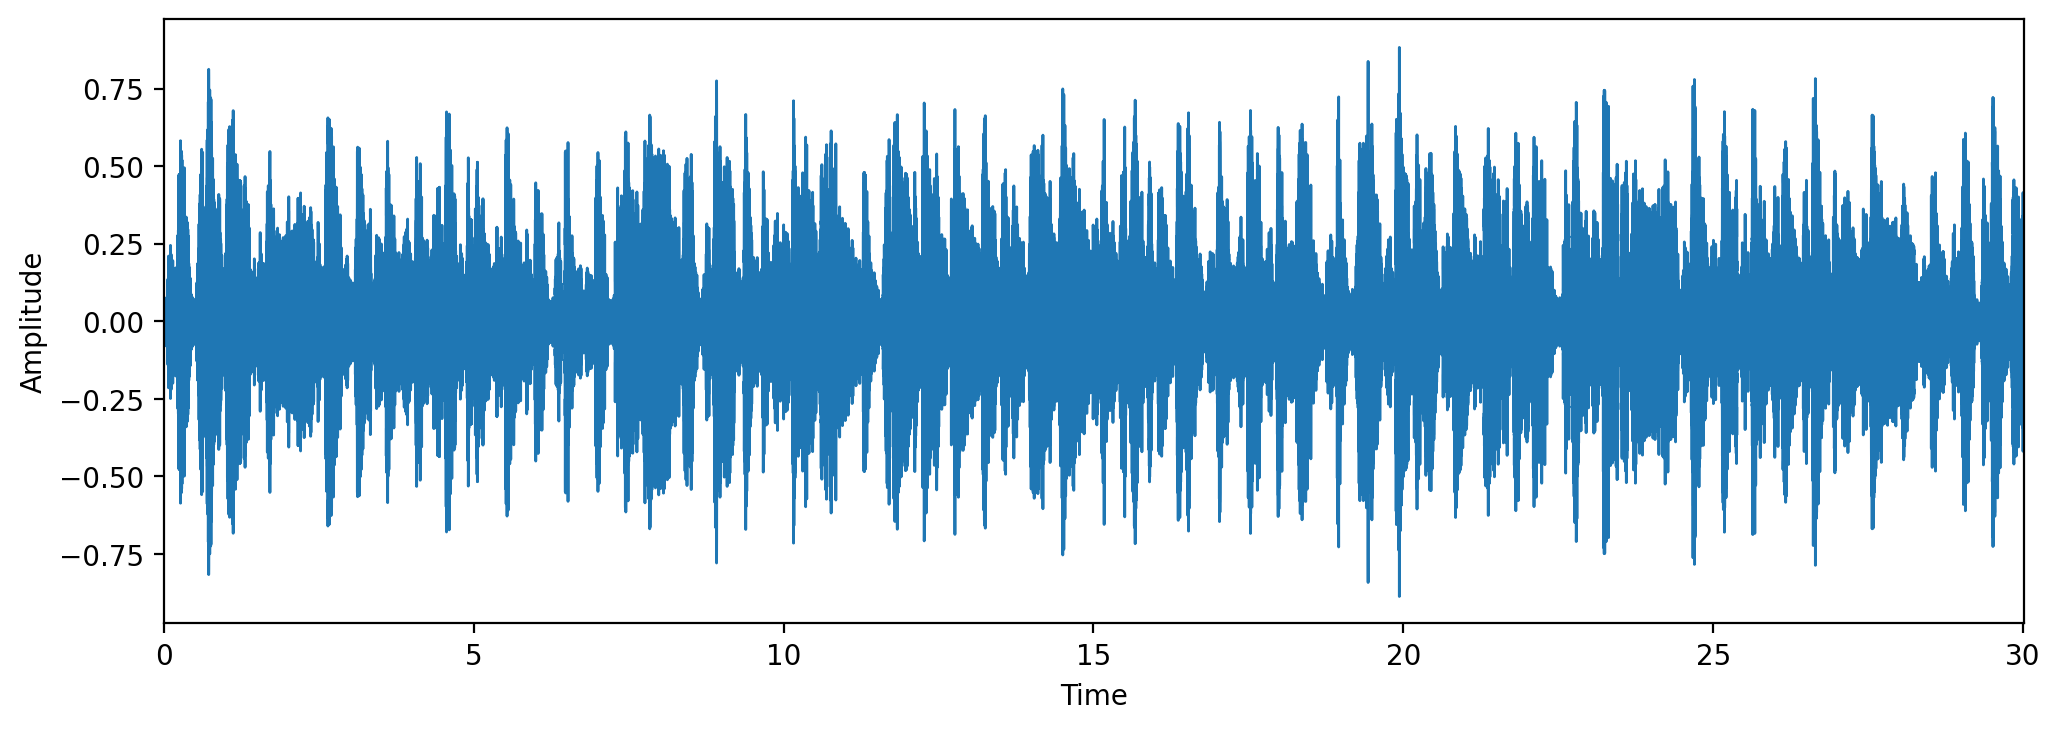

In [10]:
# plot the waveform using librosa.display.waveplot
plt.figure(figsize=(12,4), dpi=200)
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [11]:
# FFT to get spectrum
fft = np.fft.fft(signal)
magnitude = np.abs(fft)  # values of each frequency 
frequency = np.linspace(0, sr, len(magnitude))

In [12]:
fft.shape

(661794,)

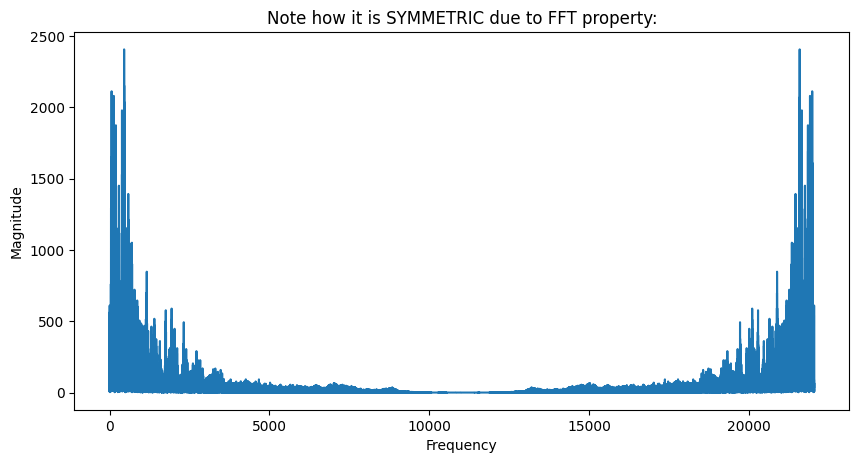

In [14]:
# plot the power spectrum
plt.figure(figsize=(10,5), dpi=100)
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Note how it is SYMMETRIC due to FFT property:")
plt.show()

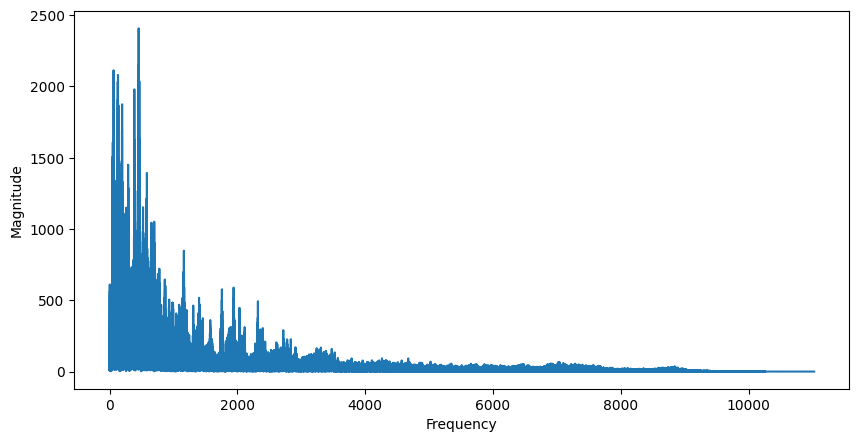

In [15]:
# focus on the first half only
left_freq = frequency[:int(len(frequency)/2)]
left_mag = magnitude[:int(len(magnitude)/2)]

# plot the power spectrum
plt.figure(figsize=(10,5), dpi=100)
plt.plot(left_freq, left_mag)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

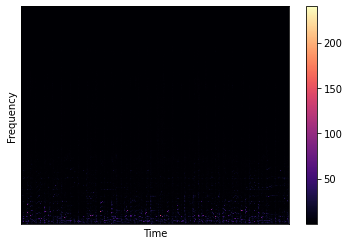

In [16]:
# short time Fourier transform to get spectrogram

# THESE ARE COMMON VALUES FOR ANALYZING MUSIC
num_samples_per_fft = 2048   # number of samples (window size for performing a single FFT)
hop_length = 512  # how much we are shifting to the right

# get the stft
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=num_samples_per_fft)

# get the magnitudes from complex values
spectrogram = np.abs(stft)

# visualization (heat map)
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

# note that the heat map is like a linear scale which is not how we percieve sounds!

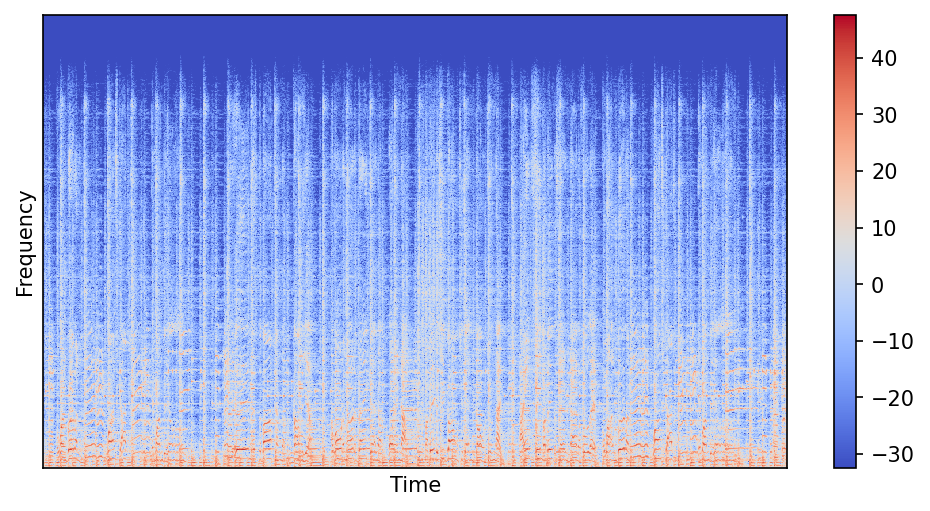

In [17]:
# log spectrogram
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# updated visualization
plt.figure(figsize=(8,4), dpi=150)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

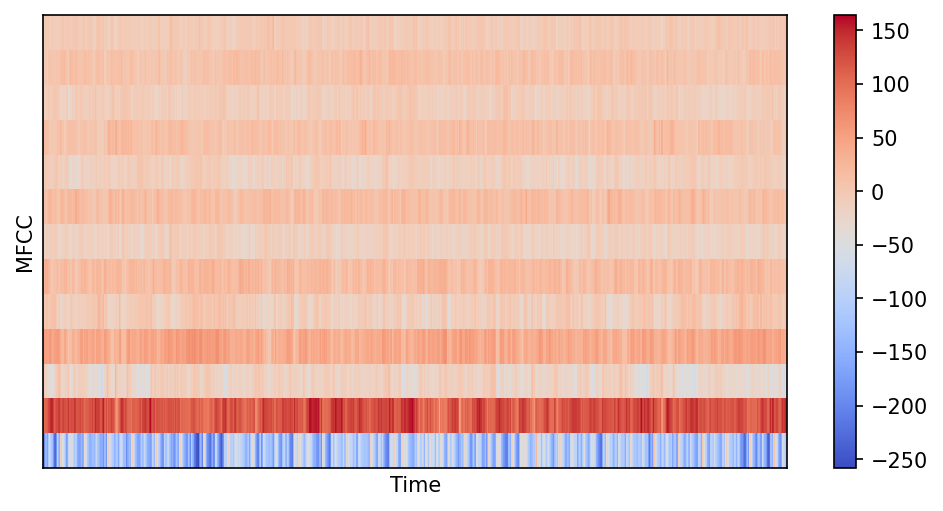

In [18]:
# How to extract the MFCCs
# usual numbers for how many MFCCs we want for music analysis (13)
MFCCs = librosa.feature.mfcc(signal, n_fft=num_samples_per_fft, hop_length=hop_length, n_mfcc=13)

# visualization
plt.figure(figsize=(8,4), dpi=150)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

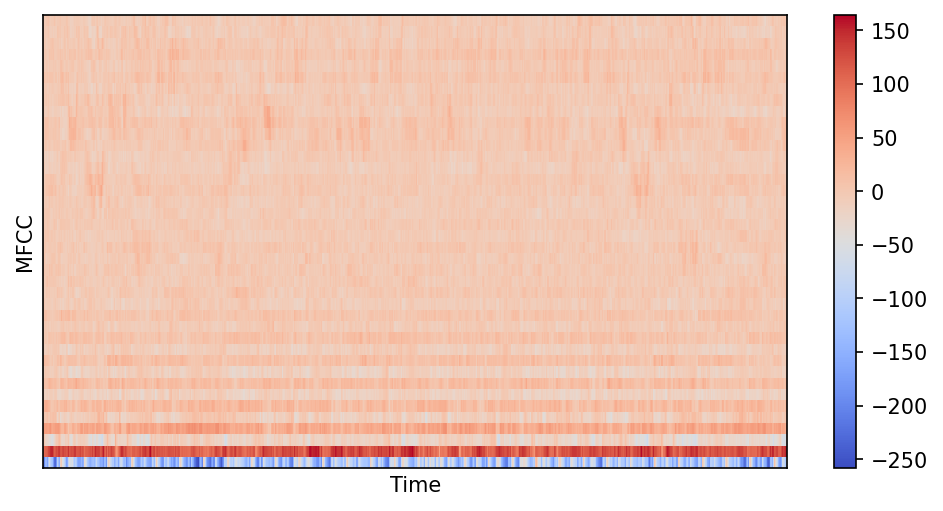

In [19]:
# usual numbers for how many MFCCs we want for music analysis (13)
MFCCs = librosa.feature.mfcc(signal, n_fft=num_samples_per_fft, hop_length=hop_length, n_mfcc=40)

# visualization
plt.figure(figsize=(8,4), dpi=150)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()